In [1]:
# Implement Dbscan
# Get dat


In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random


Text(0.5, 1.0, 'Scattered data')

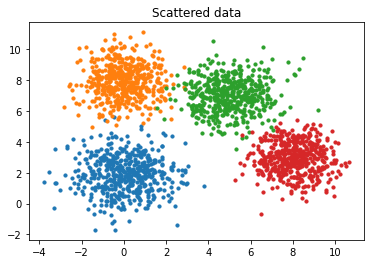

In [35]:
centers = [(0,2),(0,8),(5,7),(8,3)]
cluster_std = [1.2,1,1.1,1]
X,y = make_blobs(n_samples=2000,cluster_std=cluster_std,centers=centers,n_features=2,random_state=2200)
plt.scatter(X[y==0,0],X[y==0,1],s=10,label='Cluster1')
plt.scatter(X[y==1,0],X[y==1,1],s=10,label='Cluster1')
plt.scatter(X[y==2,0],X[y==2,1],s=10,label='Cluster1')
plt.scatter(X[y==3,0],X[y==3,1],s=10,label='Cluster1')
plt.title("Scattered data")

In [47]:
def check_core_point(eps,minPts,df,index):
    # obtain points from given index
    x,y = df.iloc[index]['X'],df.iloc[index]['Y']
    
    # check availability points within radius - get points which satisfy below
    temp = df[((np.abs(x-df['X']) <= eps) & (np.abs(y-df['Y']) <= eps)) & (df.index != index)]
#     print(temp)
    # check how many points are present within radious
    if len(temp) >= minPts:
        #return format (dataframe,is_core,is_border,is_noise)
        return (temp.index,True,False,False)
    
    elif (len(temp) < minPts) and len(temp) > 0:
        # return format (dataframe,is_core,is_border,is_noise)
        return (temp.index,False,True,False)
    
    return (temp.index,False,False,True)    

In [54]:
def cluster_with_stack(eps,minPts,df):
    # initiating cluster number
    C = 1
    #Initiating stacks to maintain
    current_stack = set()
    unvisited = list(df.index)
    clusters =[]
    
    while (len(unvisited) !=0): # ensure all points are visited
        # identify first point of a cluster
        first_point = True
        
        # choose a random unvisited point
        current_stack.add(random.choice(unvisited))
        
        while len(current_stack) !=0: # run until cluster is complete
            #pop current point from stack
            curr_idx = current_stack.pop()
            
            # check is point is core, neighbour or border
            neighbour_indexes,iscore,isborder,isnoise = check_core_point(eps,minPts,df,curr_idx)
            
            #dealing with an edge
            if (isborder & first_point):
                # for first border point, we label it and it's neighbours as noise
                clusters.append((curr_idx,0))
                clusters.extend(list(zip(neighbour_indexes,[0 for _ in range(len(neighbour_indexes))])))
                
                #label as visited
                unvisited.remove(curr_idx)
                unvisited = [e for e in unvisited if e not in neighbour_indexes]
                continue
                
            unvisited.remove(curr_idx)
            neighbour_indexes = set(neighbour_indexes) & set(unvisited) # look at only unvisited points
            
            if iscore: # if curretn point is a core
                first_point = False
                clusters.append((curr_idx,C)) #assign to a cluster
                current_stack.update(neighbour_indexes)
            
            elif isborder: #if current point is a border point
                clusters.append((curr_idx,C))
#                 continue
            
            elif isnoise: #if current point is noise
                clusters.append((curr_idx,0))
#                 continue
        
        if not first_point:
            C +=1
    return clusters

Text(0, 0.5, 'Y')

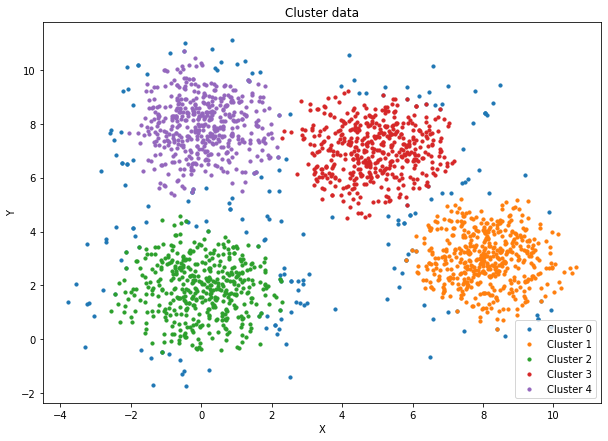

In [55]:
# set radious of the cluster
eps = 0.4
# minimum neighbouring points set to 3
minPts = 6

data = pd.DataFrame(X,columns=['X','Y'])
clustered = cluster_with_stack(eps,minPts,data)

idx,cluster = list(zip(*clustered))
cluster_df = pd.DataFrame(clustered,columns=['idx','cluster'])

plt.figure(figsize=(10,7))
for c in np.unique(cluster):
    plt.scatter(X[cluster_df['idx'][cluster_df['cluster']==c].values,0],X[cluster_df['idx'][cluster_df['cluster']==
                                                                                          c].values,1],s=10,
              label=f'Cluster{c}')
plt.legend([f'Cluster {c}' for c in np.unique(cluster)],loc="lower right")
plt.title('Cluster data')
plt.xlabel('X')
plt.ylabel('Y')
# p112979

In [41]:
data

,X,Y
0,0.251845,6.856328
1,0.695733,6.895294
2,6.558852,7.212605
3,6.419247,2.615887
4,8.503252,3.228499
...,...,...
1995,9.049245,3.477578
1996,0.884059,2.411146
1997,5.642634,5.406862
1998,6.998111,1.015759
